<a href="https://colab.research.google.com/github/amalsalilan/IPL_Infographics_Data_Analytics_-_Data_Visualization_Infosys_Internship_Oct2024/blob/K_Akshya/9_Time_Series_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("/content/all_season_details_data.csv", low_memory=False)

In [4]:
virat_data = df[df['batsman1_name'] == 'Virat Kohli']

In [5]:
virat_season_runs = virat_data.groupby('season')['runs'].sum()

In [6]:
if isinstance(virat_season_runs, pd.Series):
    virat_season_runs = virat_season_runs.reset_index()

In [7]:
virat_season_runs['season'] = pd.to_datetime(virat_season_runs['season'], format='%Y')
print(virat_season_runs)

       season  runs
0  2008-01-01   187
1  2009-01-01   258
2  2010-01-01   316
3  2011-01-01   584
4  2012-01-01   375
5  2013-01-01   655
6  2014-01-01   373
7  2015-01-01   519
8  2016-01-01   998
9  2017-01-01   314
10 2018-01-01   539
11 2019-01-01   472
12 2020-01-01   477
13 2021-01-01   423
14 2022-01-01   362
15 2023-01-01   661


In [8]:
virat_season_runs.set_index('season', inplace=True)

In [9]:
# Get the number of seasons
num_seasons = len(virat_season_runs)
num_seasons

16

In [10]:
# Fit the SARIMA model
model = SARIMAX(virat_season_runs,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 4))

In [11]:
#start_params = [0, 0, 0, 0, 0, 0, 1]
result = model.fit()
result

In [12]:
forecast = result.get_forecast(steps=5)
forecast_runs = forecast.predicted_mean.astype(int)
print(f"Predicted runs for next season: {forecast_runs}")

Predicted runs for next season: 2024-01-01    599
2025-01-01    556
2026-01-01    502
2027-01-01    683
2028-01-01    699
Freq: YS-JAN, Name: predicted_mean, dtype: int64


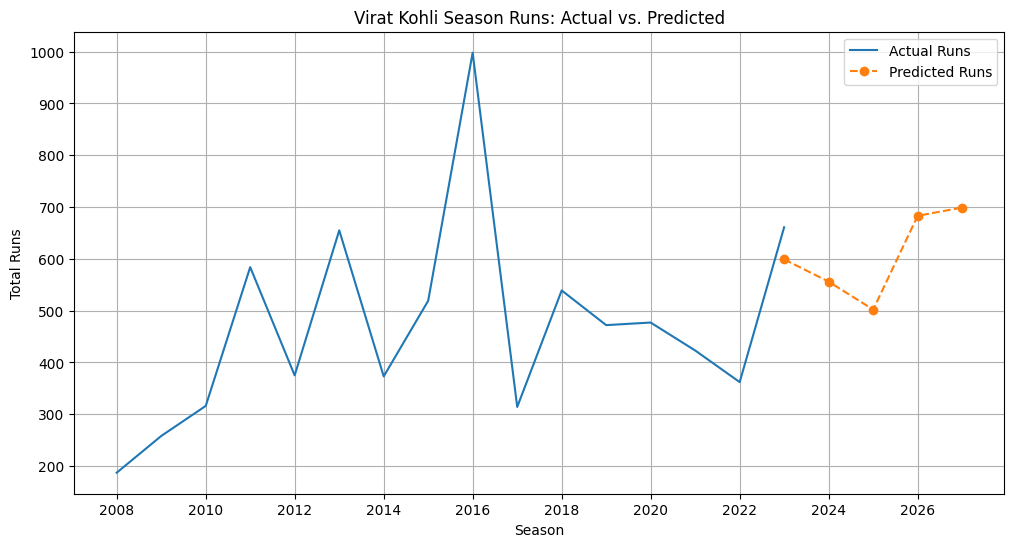

In [13]:
forecast_df = pd.DataFrame({'season': pd.date_range(start='2023-01-01', periods=5, freq='YS'), 'predicted_runs': forecast_runs.values})

# Merge the forecast with the original data
merged_data = pd.concat([virat_season_runs.reset_index(), forecast_df], ignore_index = True)
merged_data['season'] = pd.to_datetime(merged_data['season'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(virat_season_runs.index, virat_season_runs['runs'], label='Actual Runs')
plt.plot(forecast_df['season'], forecast_df['predicted_runs'], label='Predicted Runs', linestyle='--', marker='o')
plt.title('Virat Kohli Season Runs: Actual vs. Predicted')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.legend()
plt.grid(True)
plt.show()